In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from keras.layers import Dense, Input
from keras.models import Model
from keras.datasets import mnist

In [2]:
dataset = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [7]:
#Preprocessing on original dataset
(x_train, y_train), (x_test, y_test) = dataset
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0
#Flattening the dataset
x_train = x_train.reshape(len(x_train), np.prod(x_train.shape[1:]))
x_test = x_test.reshape(len(x_test), np.prod(x_test.shape[1:]))
img, shape = x_train.shape
print(shape)

784


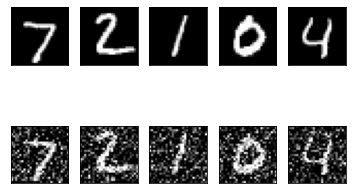

In [15]:
#Creating noisy images
noise_factor = 0.4
x_train_noisy = x_train + noise_factor*np.random.normal(size=x_train.shape)
x_test_noisy = x_test + noise_factor*np.random.normal(size=x_test.shape)

x_train_noisy = np.clip(x_train_noisy, 0.0, 1.0)
x_test_noisy = np.clip(x_test_noisy, 0.0, 1.0)
#Displaying the 1st 5 noisy images
n = 5
dims = (28, 28)
for i in range(n):
    #Displaying the original images
    ax = plt.subplot(2, n, i+1)
    plt.imshow(x_test[i].reshape(*dims), cmap='gray')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    if i==n/2:
      ax.set_title('Original Images')
    #Displaying the noisy images
    ax = plt.subplot(2, n, i+1+n)
    plt.imshow(x_test_noisy[i].reshape(*dims), cmap='gray')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    if i==n/2:
      ax.set_title('Noisy Images')
plt.show()

In [25]:
def autoencoder_outputs(autoencoder, n, dims):
  #Displaying 'n' sample images
  plt.figure(figsize=(10, 7))

  images = autoencoder.predict(x_test_noisy)

  for i in range(n):
    # plot original image
    ax = plt.subplot(3, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    if i == n/2:
        ax.set_title('Original Images')

    # plot noisy image 
    ax = plt.subplot(3, n, i + 1 + n)
    plt.imshow(x_test_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    if i == n/2:
        ax.set_title('Noisy Input')
        
    # plot noisy image 
    ax = plt.subplot(3, n, i + 1 + 2*n)
    plt.imshow(images[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    if i == n/2:
        ax.set_title('Autoencoder Output')
  plt.show()

In [19]:
input_size = 784
hidden_size = 128
code_size = 32
def denoising_autoencoder(shape=shape, classes=10):
  input_shape = Input(shape=shape)
  encoded = Dense(hidden_size, activation='relu')(input_shape)
  code = Dense(code_size, activation='relu')(encoded)
  decoded = Dense(hidden_size, activation='relu')(code)
  output = Dense(input_size, activation='sigmoid')(decoded)

  autoencoder = Model(inputs=input_shape, outputs=output)

  return autoencoder

In [20]:
autoencoder = denoising_autoencoder()
print(autoencoder.summary())

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 784)]             0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 32)                4128      
                                                                 
 dense_2 (Dense)             (None, 128)               4224      
                                                                 
 dense_3 (Dense)             (None, 784)               101136    
                                                                 
Total params: 209,968
Trainable params: 209,968
Non-trainable params: 0
_________________________________________________________________
None


In [21]:
autoencoder.compile(optimizer='Adam', loss='binary_crossentropy')
autoencoder.fit(x_train_noisy, x_train, epochs=20)

Epoch 1/20
1875/1875 [==============================] - 11s 5ms/step - loss: 0.1617
Epoch 2/20
1875/1875 [==============================] - 10s 5ms/step - loss: 0.1239
Epoch 3/20
1875/1875 [==============================] - 10s 6ms/step - loss: 0.1172
Epoch 4/20
1875/1875 [==============================] - 10s 5ms/step - loss: 0.1141
Epoch 5/20
1875/1875 [==============================] - 10s 5ms/step - loss: 0.1122
Epoch 6/20
1875/1875 [==============================] - 10s 5ms/step - loss: 0.1110
Epoch 7/20
1875/1875 [==============================] - 10s 5ms/step - loss: 0.1100
Epoch 8/20
1875/1875 [==============================] - 10s 5ms/step - loss: 0.1092
Epoch 9/20
1875/1875 [==============================] - 10s 5ms/step - loss: 0.1086
Epoch 10/20
1875/1875 [==============================] - 11s 6ms/step - loss: 0.1080
Epoch 11/20
1875/1875 [==============================] - 10s 5ms/step - loss: 0.1075
Epoch 12/20
1875/1875 [==============================] - 10s 5ms/step - lo

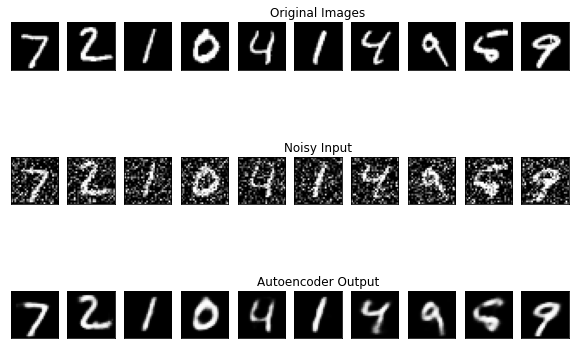

In [26]:
autoencoder_outputs(autoencoder, 10, (28, 28))